# Accumulated Local Effects plots
This script serves to reproduce the plots which are shown in the paper.

## Importing the AccumulatedLocalEffects class

In [1]:
from ale import AccumulatedLocalEffects

## Importing the [data sets (TODO)](https://www.youtube.com/watch?v=dQw4w9WgXcQ&ab_channel=RickAstleyVEVO)

In [8]:
import numpy as np

# Training data sets
MI_LSD_SET03_X_train = np.load('data/MI-LSD-SET03_X_train.npy')
MI_LSD_SET03_y_train = np.load('data/MI-LSD-SET03_y_train.npy')

LSD_SET03_X_train = np.load('data/LSD-SET03_X_train.npy')
LSD_SET03_y_train = np.load('data/LSD-SET03_y_train.npy')

MI_LSD_SET03_sO2_X_train = np.load('data/MI-LSD-SET03-sO2_X_train.npy')
MI_LSD_SET03_sO2_y_train = np.load('data/MI-LSD-SET03-sO2_y_train.npy')

# Test data sets
MI_LSD_SET03_X_test = np.load('data/MI-LSD-SET03_X_test.npy')
MI_LSD_SET03_y_test = np.load('data/MI-LSD-SET03_y_test.npy')

MI_LSD_PHANTOMB_X_test = np.load('data/MI-LSD-PHANTOMB_X_test.npy')
MI_LSD_PHANTOMB_y_test = np.load('data/MI-LSD-PHANTOMB_y_test.npy')

MI_LSD_PHANTOMC_X_test = np.load('data/MI-LSD-PHANTOMC_X_test.npy')
MI_LSD_PHANTOMC_y_test = np.load('data/MI-LSD-PHANTOMC_y_test.npy')

LSD_SET03_X_test = np.load('data/LSD-SET03_X_test.npy')
LSD_SET03_y_test = np.load('data/LSD-SET03_y_test.npy')

LSD_PHANTOMB_X_test = np.load('data/LSD-PHANTOMB_X_test.npy')
LSD_PHANTOMB_y_test = np.load('data/LSD-PHANTOMB_y_test.npy')

LSD_PHANTOMC_X_test = np.load('data/LSD-PHANTOMC_X_test.npy')
LSD_PHANTOMC_y_test = np.load('data/LSD-PHANTOMC_y_test.npy')

MI_LSD_SET03_sO2_X_test = np.load('data/MI-LSD-SET03-sO2_X_test.npy')
MI_LSD_SET03_sO2_y_test = np.load('data/MI-LSD-SET03-sO2_y_test.npy')

## Initializing the [LightGBM regressor](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html)

In [3]:
from lightgbm import LGBMRegressor

reg = LGBMRegressor(objective='cross_entropy',
                    n_estimators=300,
                    num_leaves=100,
                    seed=1)

## Instance of the AccumulatedLocalEffects class

In [4]:
ALE = AccumulatedLocalEffects(reg=reg,
                              filename='plots/MI_LSD_SET03',
                              X_train=MI_LSD_SET03_X_train,
                              y_train=MI_LSD_SET03_y_train,
                              num_illum=4,
                              num_wlen=16)

## Multiple illumination learned spectral decoloring (MI-LSD) for rCu

### Plotting the ALE functions

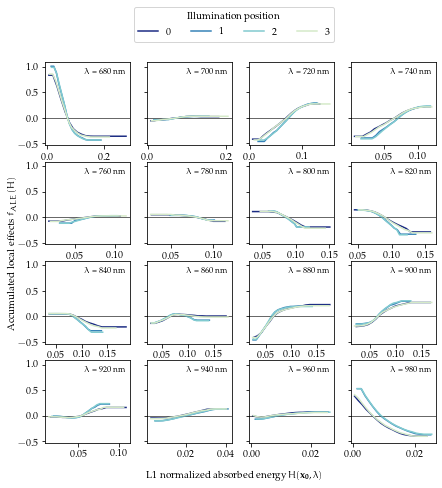

In [17]:
ALE.plot_ALE_function(illum_pos=[0, 1, 2, 3])

### Plotting the 'feature clipping' MAE-progressions
**SET03**

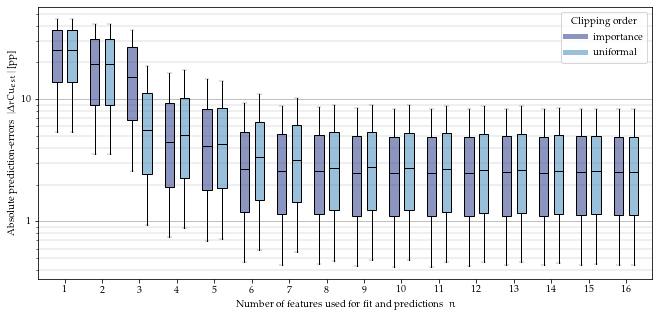

In [18]:
MI_LSD_SET03_stats = ALE.plot_feature_clipping(MI_LSD_SET03_X_test,
                                               MI_LSD_SET03_y_test,
                                               illum_pos=[1],
                                               clipping_order=['importance', 'uniformal'])

Feature indices.

In [19]:
print(MI_LSD_SET03_stats['importance'][0])
print(MI_LSD_SET03_stats['uniformal'][0])

[ 0. 15.  2. 10.  3.  7. 11.  8.  6. 12.  9. 13. 14.  4.  5.  1.]
[15.  0. 13.  2. 11.  4.  9.  6. 14.  1. 10.  5. 12.  3.  8.  7.]


Median absolute errors.

In [20]:
print(MI_LSD_SET03_stats['importance'][3])
print(MI_LSD_SET03_stats['uniformal'][3])

[25.13884721 19.49083772 15.1076115   4.50628065  4.12501867  2.70799146
  2.60534612  2.56718823  2.51158248  2.49779841  2.48974706  2.51232367
  2.51665394  2.51601579  2.5216349   2.52312129]
[25.13884721 19.48940958  5.63215311  5.12892251  4.27028341  3.34058425
  3.20605987  2.75291995  2.76554324  2.74564189  2.66547625  2.65351802
  2.64556811  2.58732963  2.56765245  2.52312129]


**PHANTOMB**

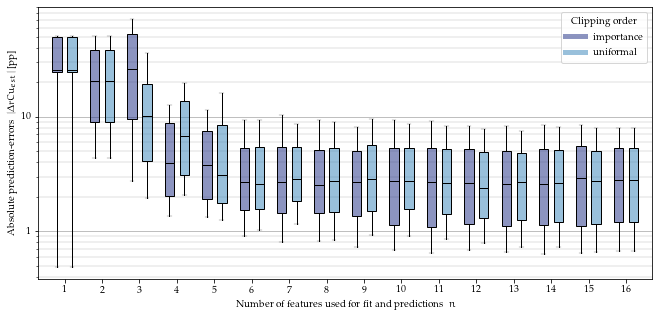

In [21]:
ALE.filename = 'plots/MI_LSD_PHANTOMB'

MI_LSD_PHANTOMB_stats = ALE.plot_feature_clipping(MI_LSD_PHANTOMB_X_test, 
                                                  MI_LSD_PHANTOMB_y_test,
                                                  illum_pos=[1],
                                                  clipping_order=['importance', 'uniformal'])

Feature indices.

In [22]:
print(MI_LSD_PHANTOMB_stats['importance'][0])
print(MI_LSD_PHANTOMB_stats['uniformal'][0])

[ 0. 15.  2. 10.  3.  7. 11.  8.  6. 12.  9. 13. 14.  4.  5.  1.]
[15.  0. 13.  2. 11.  4.  9.  6. 14.  1. 10.  5. 12.  3.  8.  7.]


Median absolute errors.

In [23]:
print(MI_LSD_PHANTOMB_stats['importance'][3])
print(MI_LSD_PHANTOMB_stats['uniformal'][3])

[25.49088303 20.36826686 26.15780869  3.95640587  3.78452856  2.70838742
  2.67923989  2.55196885  2.68806856  2.7585277   2.66258508  2.6533041
  2.60711166  2.58507847  2.88770593  2.77869429]
[25.49088303 20.34880957 10.20434482  6.75338831  3.08222836  2.57007936
  2.84383685  2.72724962  2.83536557  2.75659968  2.63291042  2.39938877
  2.68136634  2.61864693  2.73590731  2.77869429]


**PHANTOMC**

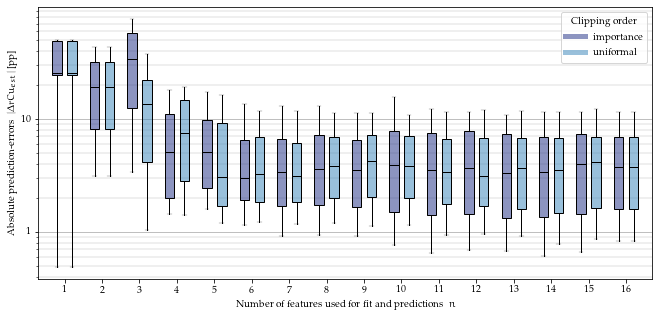

In [24]:
ALE.filename = 'plots/MI_LSD_PHANTOMC'

MI_LSD_PHANTOMC_stats = ALE.plot_feature_clipping(MI_LSD_PHANTOMC_X_test, 
                                                  MI_LSD_PHANTOMC_y_test,
                                                  illum_pos=[1],
                                                  clipping_order=['importance', 'uniformal'])

Feature indices.

In [26]:
print(MI_LSD_PHANTOMC_stats['importance'][0])
print(MI_LSD_PHANTOMC_stats['uniformal'][0])

[ 0. 15.  2. 10.  3.  7. 11.  8.  6. 12.  9. 13. 14.  4.  5.  1.]
[15.  0. 13.  2. 11.  4.  9.  6. 14.  1. 10.  5. 12.  3.  8.  7.]


Median absolute errors.

In [27]:
print(MI_LSD_PHANTOMC_stats['importance'][3])
print(MI_LSD_PHANTOMC_stats['uniformal'][3])

[25.49088303 19.35387343 34.14968841  5.08423491  5.07110132  3.0204771
  3.41699111  3.59312778  3.52914276  3.87645572  3.55827285  3.66580922
  3.32836119  3.40244278  3.972346    3.77782088]
[25.49088303 19.31464421 13.60101221  7.55627707  3.04994385  3.24640722
  3.08624254  3.79657819  4.23511311  3.81988725  3.40338468  3.09949154
  3.64297146  3.52340813  4.10725426  3.77782088]


## Learned spectral decoloring (LSD) for rCu

In [28]:
ALE.X_train = LSD_SET03_X_train
ALE.y_train = LSD_SET03_y_train
ALE.num_illum = 1

### Plotting the ALE functions

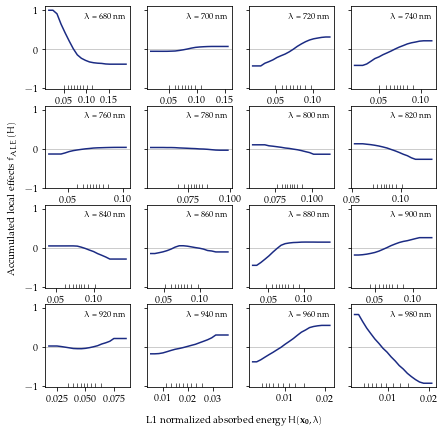

In [29]:
ALE.plot_ALE_function()

### Plotting the 'feature clipping' MAE-progressions
**SET03**

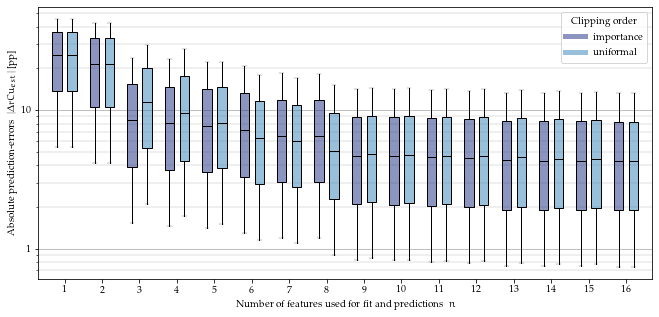

In [30]:
LSD_SET03_stats = ALE.plot_feature_clipping(LSD_SET03_X_test,
                                            LSD_SET03_y_test,
                                            clipping_order=['importance', 'uniformal'])

Feature indices.

In [31]:
print(LSD_SET03_stats['importance'][0])
print(LSD_SET03_stats['uniformal'][0])

[15.  0. 14.  2.  3. 10. 13. 11.  7.  9.  8. 12.  6.  4.  1.  5.]
[15.  0. 13.  2. 11.  4.  9.  6. 14.  1. 10.  5. 12.  3.  8.  7.]


Median absolute errors.

In [32]:
print(LSD_SET03_stats['importance'][3])
print(LSD_SET03_stats['uniformal'][3])

[25.13884721 21.62456944  8.51110788  8.01033019  7.67271205  7.19359578
  6.5398527   6.52611831  4.69588797  4.68250113  4.59772719  4.5010816
  4.35141585  4.334945    4.33071225  4.31824184]
[25.13884721 21.62456944 11.42848336  9.46942523  8.12261484  6.32074641
  6.0120759   5.08066527  4.82319829  4.76105269  4.68971027  4.6508718
  4.57481171  4.47796544  4.41877764  4.31824184]


**PHANTOMB**

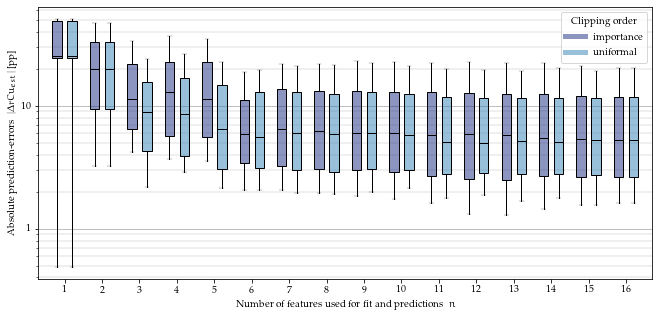

In [33]:
ALE.filename = 'plots/LSD_PHANTOMB'

LSD_PHANTOMB_stats = ALE.plot_feature_clipping(LSD_PHANTOMB_X_test, 
                                               LSD_PHANTOMB_y_test,
                                               clipping_order=['importance', 'uniformal'])

Feature indices.

In [34]:
print(LSD_PHANTOMB_stats['importance'][0])
print(LSD_PHANTOMB_stats['uniformal'][0])

[15.  0. 14.  2.  3. 10. 13. 11.  7.  9.  8. 12.  6.  4.  1.  5.]
[15.  0. 13.  2. 11.  4.  9.  6. 14.  1. 10.  5. 12.  3.  8.  7.]


Median absolute errors.

In [35]:
print(LSD_PHANTOMB_stats['importance'][3])
print(LSD_PHANTOMB_stats['uniformal'][3])

[25.49088303 20.1285031  11.29602124 12.93932886 11.39812301  5.88480394
  6.41961795  6.26614053  6.06280325  6.01969777  5.82451052  5.94837603
  5.81414833  5.49759094  5.37495525  5.27136644]
[25.49088303 20.1285031   8.85997223  8.59157897  6.42759572  5.57667419
  6.00749993  5.85079192  5.97284768  5.83598612  5.1130123   4.99337722
  5.16110966  5.04964773  5.27049983  5.27136644]


**PHANTOMC**

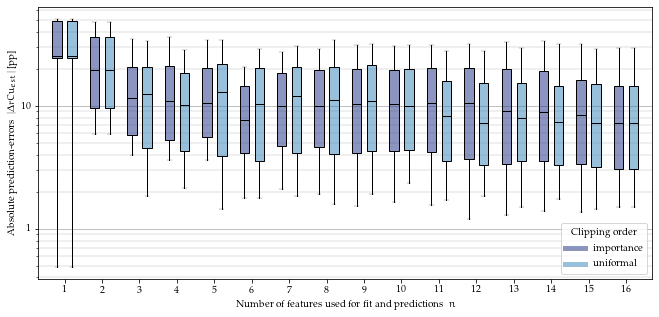

In [36]:
ALE.filename = 'plots/LSD_PHANTOMC'

LSD_PHANTOMC_stats = ALE.plot_feature_clipping(LSD_PHANTOMC_X_test, 
                                               LSD_PHANTOMC_y_test,
                                               clipping_order=['importance', 'uniformal'])

Feature indices.

In [37]:
print(LSD_PHANTOMC_stats['importance'][0])
print(LSD_PHANTOMC_stats['uniformal'][0])

[15.  0. 14.  2.  3. 10. 13. 11.  7.  9.  8. 12.  6.  4.  1.  5.]
[15.  0. 13.  2. 11.  4.  9.  6. 14.  1. 10.  5. 12.  3.  8.  7.]


Median absolute errors.

In [38]:
print(LSD_PHANTOMC_stats['importance'][3])
print(LSD_PHANTOMC_stats['uniformal'][3])

[25.49088303 19.606755   11.53118259 11.01556848 10.60755952  7.69393269
  9.94456112 10.05887418 10.40147895 10.25694547 10.48262727 10.45290914
  9.04405532  8.82937748  8.39867457  7.20472043]
[25.49088303 19.606755   12.43753832 10.24278837 12.8794541  10.3318341
 11.93738381 11.06949505 10.91932369 10.03530137  8.27067011  7.2545342
  8.03191353  7.40047584  7.30268006  7.20472043]


## Multiple illumination learned spectral decoloring (MI-LSD) for sO2

In [10]:
ALE.X_train = MI_LSD_SET03_sO2_X_train
ALE.y_train = MI_LSD_SET03_sO2_y_train
ALE.num_illum = 4

### Plotting the ALE functions

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


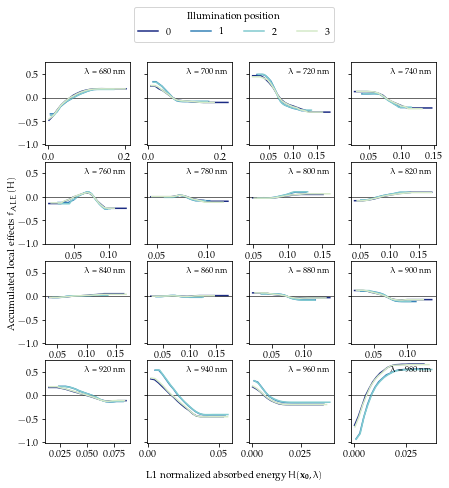

In [11]:
ALE.plot_ALE_function(illum_pos=[0, 1, 2, 3])

### Plotting the 'feature clipping' MAE-progressions
**SET03_sO2**

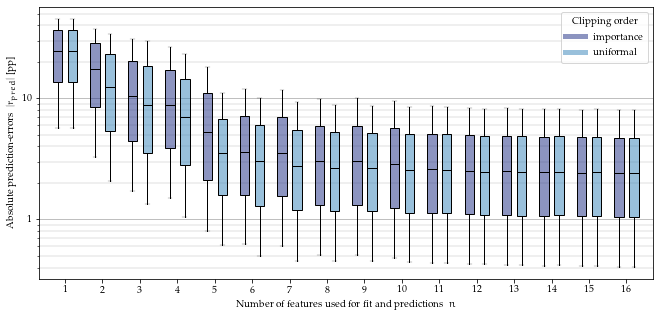

In [12]:
MI_LSD_SET03_sO2_stats = ALE.plot_feature_clipping(MI_LSD_SET03_sO2_X_test,
                                                   MI_LSD_SET03_sO2_y_test,
                                                   illum_pos=[1],
                                                   clipping_order=['importance', 'uniformal'])

Feature indices.

In [13]:
print(MI_LSD_SET03_sO2_stats['importance'][0])
print(MI_LSD_SET03_sO2_stats['uniformal'][0])

[15. 13.  2.  4.  0. 14.  1. 12.  3. 11.  7.  5. 10.  6.  9.  8.]
[15.  0. 13.  2. 11.  4.  9.  6. 14.  1. 10.  5. 12.  3.  8.  7.]


Median absolute errors.

In [14]:
print(MI_LSD_SET03_sO2_stats['importance'][3])
print(MI_LSD_SET03_sO2_stats['uniformal'][3])

[24.66627771 17.61739705 10.48109265  8.88551384  5.27558715  3.63238663
  3.5464834   3.03552421  3.03912588  2.87651734  2.5869024   2.52186595
  2.49391396  2.46117728  2.41799361  2.40795963]
[24.66627771 12.28811818  8.83029191  7.0051873   3.55300484  3.02099681
  2.75870943  2.67499119  2.65916653  2.57308027  2.54656078  2.47854211
  2.48472541  2.47309682  2.46113506  2.40795963]
